# LetsGrowMore - Advanced Level Task (May 2022)

# Task-7 : Develop A Neural Network That Can Read HandWriting


Begin my neural network machine learning project with MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user friendly interface that's ideal for beginners
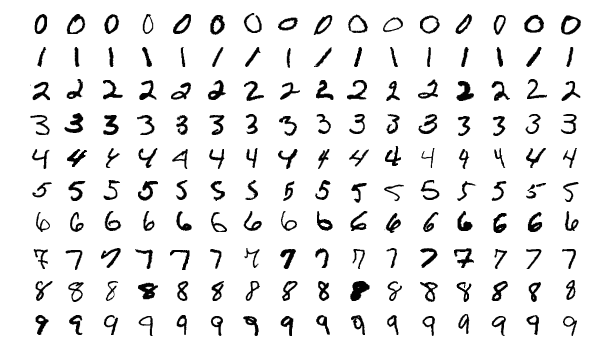

Dataset Link - https://en.wikipedia.org/wiki/MNIST_database

# Importing the Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential


# Splitting the Dataset into Train & Test Sets

The MNIST database (Modified National Institute of Standards and Technology Database) is a large database of handwriten digits that is commonly used for training various image processing systems

In [2]:
(train_img, train_labels) , (test_img, test_labels) = datasets.mnist.load_data()

# Analyzing the Dataset

In [3]:
train_img.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_img.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

# Normalize Images

In [7]:
train_img, test_img = train_img/255.0,test_img/255.0

In [8]:
len(train_img)

60000

# Visualizing Images

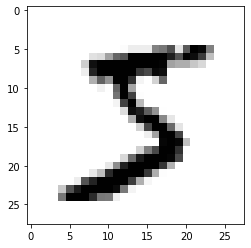

In [9]:
plt.imshow(train_img[0], cmap=plt.cm.gray_r , interpolation='nearest')

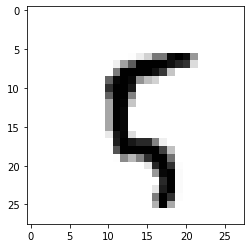

In [10]:
plt.imshow(train_img[100] , cmap=plt.cm.gray_r, interpolation = 'nearest')

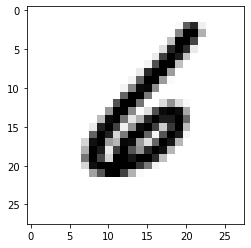

In [11]:
plt.imshow(train_img[999] , cmap=plt.cm.gray_r, interpolation = 'nearest')

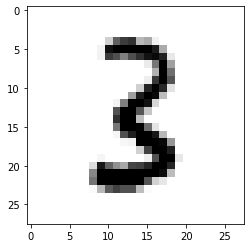

In [12]:
plt.imshow(train_img[50000] , cmap=plt.cm.gray_r, interpolation = 'nearest')

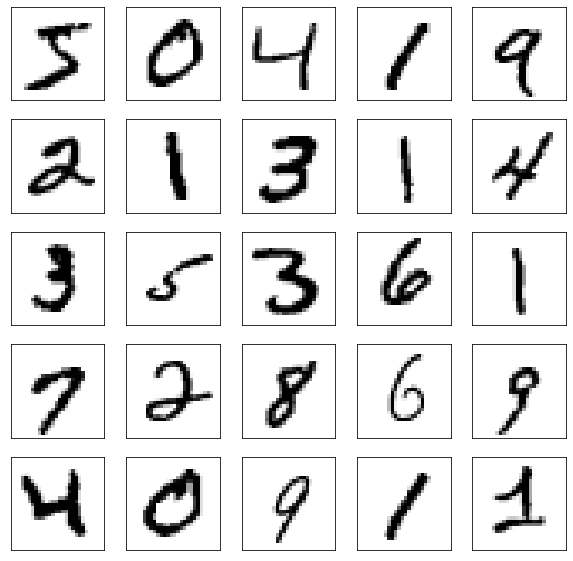

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap = plt.cm.binary)
plt.show()

# Data Preprocessing

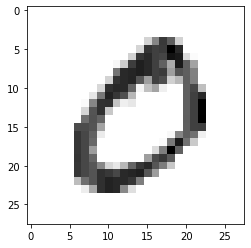

In [14]:
train_img = keras.utils.normalize(train_img, axis=1)
test_img = keras.utils.normalize(test_img, axis=1)
plt.imshow(train_img[1], cmap = plt.cm.binary)
plt.show()

In [15]:
train_img = np.array(train_img).reshape(-1,28,28,1)
print("Dimension of Trainset:" , train_img.shape)
test_img = np.array(test_img).reshape(-1,28,28,1)
print("Dimension of Testset:" , test_img.shape)


Dimension of Trainset: (60000, 28, 28, 1)
Dimension of Testset: (10000, 28, 28, 1)


# Creating CNN Model

In [16]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = train_img.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('softmax'))




In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

# Create and Train The Model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.compile(
       optimizer= tf.keras.optimizers.Adam(0.001),
       loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
       metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [20]:
model.fit(
       train_img, train_labels,
       epochs = 10,
       validation_data = (test_img, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3189 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.1825 - val_sparse_categorical_accuracy: 0.9482
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1433 - sparse_categorical_accuracy: 0.9581 - val_loss: 0.1252 - val_sparse_categorical_accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0973 - sparse_categorical_accuracy: 0.9714 - val_loss: 0.1037 - val_sparse_categorical_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9783 - val_loss: 0.0932 - val_sparse_categorical_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9836 - val_loss: 0.0907 - val_sparse_categorical_accuracy: 0.9723
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - spars

# Evaluating the Model

In [21]:
test_loss, test_acc = model.evaluate(test_img,test_labels)
print("Test Accuracy On samples:",test_acc)
print("Test Loss on Samples: ",test_loss)

313/313 [==============================] - 0s 2ms/step - loss: 0.0816 - sparse_categorical_accuracy: 0.9752
Test Accuracy On samples: 0.9751999974250793
Test Loss on Samples:  0.08157450705766678


# Testing the Model with a Custom Image

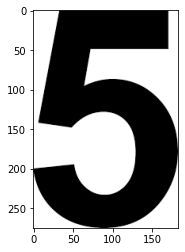

In [22]:
image = cv2.imread('myimage.png')
plt.imshow(image)
plt.show()

In [23]:
image = cv2.resize((cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)),(28,28), interpolation = cv2.INTER_AREA)

In [24]:
image.shape

(28, 28)

In [25]:
image = keras.utils.normalize(image, axis = 1)

In [26]:
image = np.array(image).reshape(-1,28,28,1)

In [27]:
image.shape

(1, 28, 28, 1)

In [28]:
print("Number predicted from the Image")
print(np.argmax(model.predict(image)))

Number predicted from the Image
5


# CONCLUSION

Using CNN Deep Learning Model, we were able to predict the number in the image exactly